In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Convert the 'date' column to datetime format, handling inconsistent formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any NaT values that could not be parsed
missing_dates = df['date'].isna().sum()
print(f"Number of missing dates after parsing: {missing_dates}")

# Display the first few rows to confirm
df.head(3)


Number of missing dates after parsing: 1351341


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A


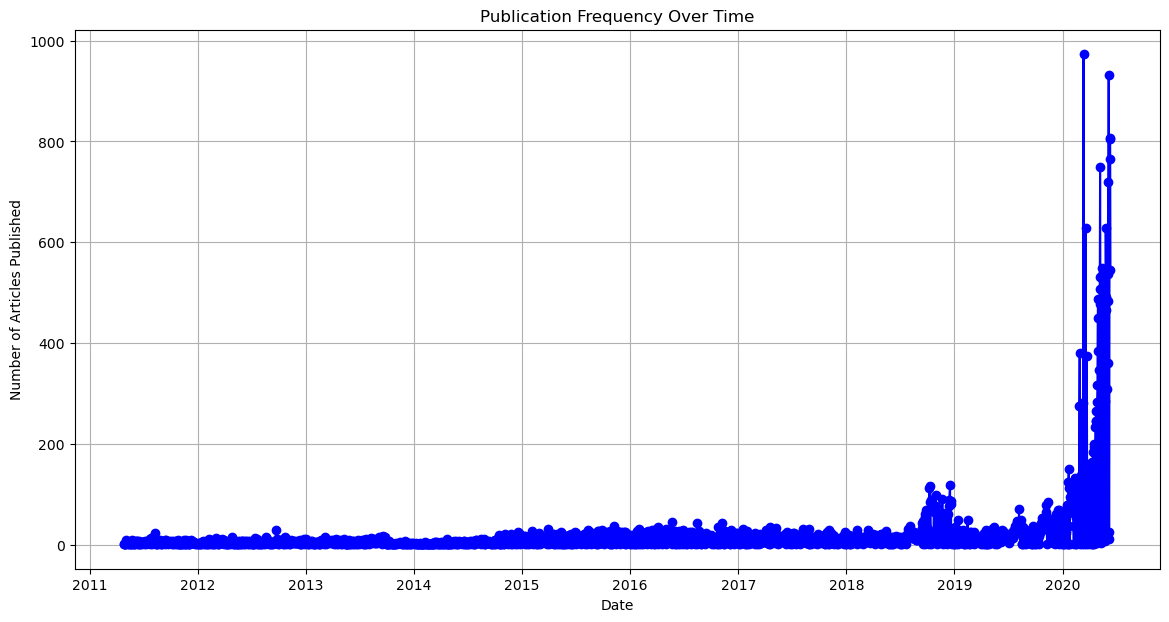

In [4]:
# Aggregate the data by date to count the number of articles published each day
df['publication_date'] = df['date'].dt.date
daily_publications = df.groupby('publication_date').size()

# Plot the publication frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_publications.index, daily_publications.values, color='blue', linestyle='-', marker='o')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()


 - The number of financial articles published within 2020 is skyrocketed and slight fail down afterward, it might be related to pandamic Covid 19, as people can spent most of thier time reading newspapers due to lockdown.

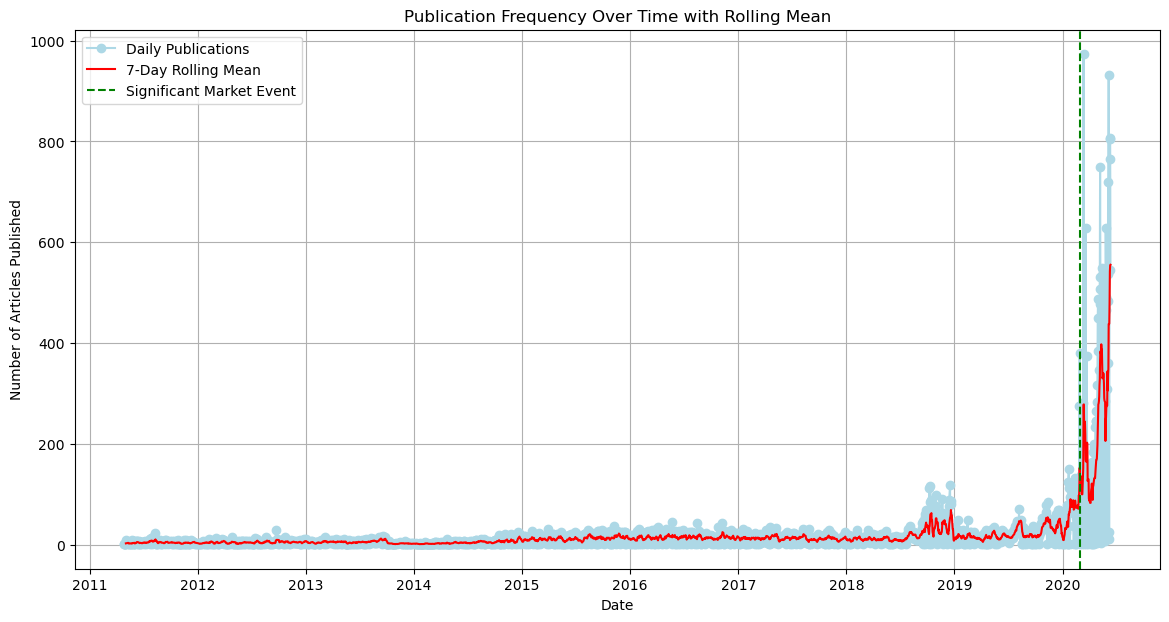

In [5]:
# Calculate the rolling mean to smooth the time series
rolling_mean = daily_publications.rolling(window=7).mean()

# Plot the original data and the rolling mean
plt.figure(figsize=(14, 7))
plt.plot(daily_publications.index, daily_publications.values, color='lightblue', linestyle='-', marker='o', label='Daily Publications')
plt.plot(daily_publications.index, rolling_mean, color='red', linestyle='-', label='7-Day Rolling Mean')
plt.title('Publication Frequency Over Time with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.axvline(pd.to_datetime("2020-03-01"), color='green', linestyle='--', label='Significant Market Event')
plt.legend()
plt.grid(True)
plt.show()


- To have a better view the influnces months and years have on the amount published articles the above graph demonstrate the from 2019 to 2020 the number of published articles rise up to 1000 per day.

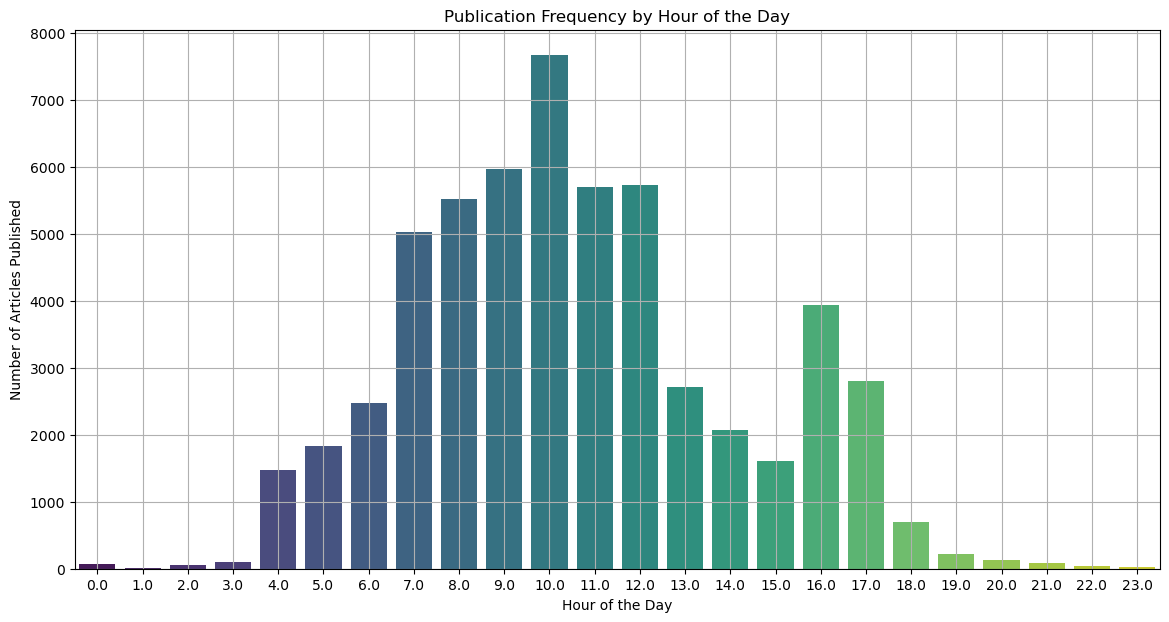

In [6]:
# Extract the hour from the date column
df['publication_hour'] = df['date'].dt.hour

# Aggregate the data by hour to count the number of articles published at each hour
hourly_publications = df.groupby('publication_hour').size()

# Plot the publication frequency by hour of the day
plt.figure(figsize=(14, 7))
sns.barplot(x=hourly_publications.index, y=hourly_publications.values, palette='viridis')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()


- The above graph reaveals the publication frequency per Hour of the day. We found out starting from 8:00 oçlock untile 10:00 the number of published articles raise and then fall in the same manner all the way to 16:00 Hr. 
- Effective publication Hr goes to 4:00 to 17:00. 